In [1]:
!pip install shap;
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['target']), pd.DataFrame(X, columns=columns)], axis=1)

  num_features = X.shape[1]
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='target', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('Target')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()


In [3]:
data=load_wine()
df=pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


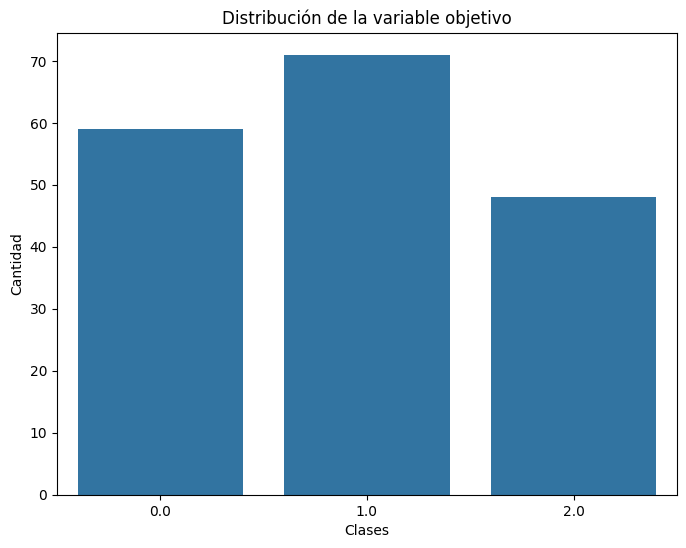

In [5]:
# Visualización del balanceo de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()

In [6]:
df=df[df.target!=1]
df['target']=df['target'].replace(2, 1)

<ipython-input-6-7af7dc32478b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['target'].replace(2, 1)


In [7]:
df.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,1.0
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,1.0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,1.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,1.0


In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,13.479626,2.604206,2.447290,19.001869,103.186916,2.319159,1.995047,0.360654,1.564766,6.366262,0.891869,2.496449,897.775701,0.448598
std,0.573348,1.105115,0.208438,3.255387,11.190571,0.675408,1.155059,0.125347,0.553097,2.019544,0.221718,0.803295,302.746931,0.499691
min,12.200000,1.240000,2.040000,11.200000,80.000000,0.980000,0.340000,0.170000,0.550000,3.520000,0.480000,1.270000,415.000000,0.000000
25%,13.060000,1.725000,2.300000,16.750000,95.000000,1.680000,0.725000,0.265000,1.140000,4.960000,0.690000,1.700000,645.000000,0.000000
50%,13.500000,2.050000,2.410000,19.000000,102.000000,2.450000,2.430000,0.320000,1.540000,5.700000,0.910000,2.730000,845.000000,0.000000
75%,13.865000,3.410000,2.610000,21.000000,111.500000,2.850000,2.995000,0.460000,1.970000,7.550000,1.075000,3.200000,1112.500000,1.000000
max,14.830000,5.650000,3.220000,27.000000,132.000000,3.880000,3.930000,0.630000,2.960000,13.000000,1.280000,4.000000,1680.000000,1.000000


In [9]:
df.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [10]:
len(df[df.target==1]), len(df[df.target==0])

(48, 59)

In [11]:
feature_names=df.drop('target',axis=1).columns.values
feature_names

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'].values.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=42)

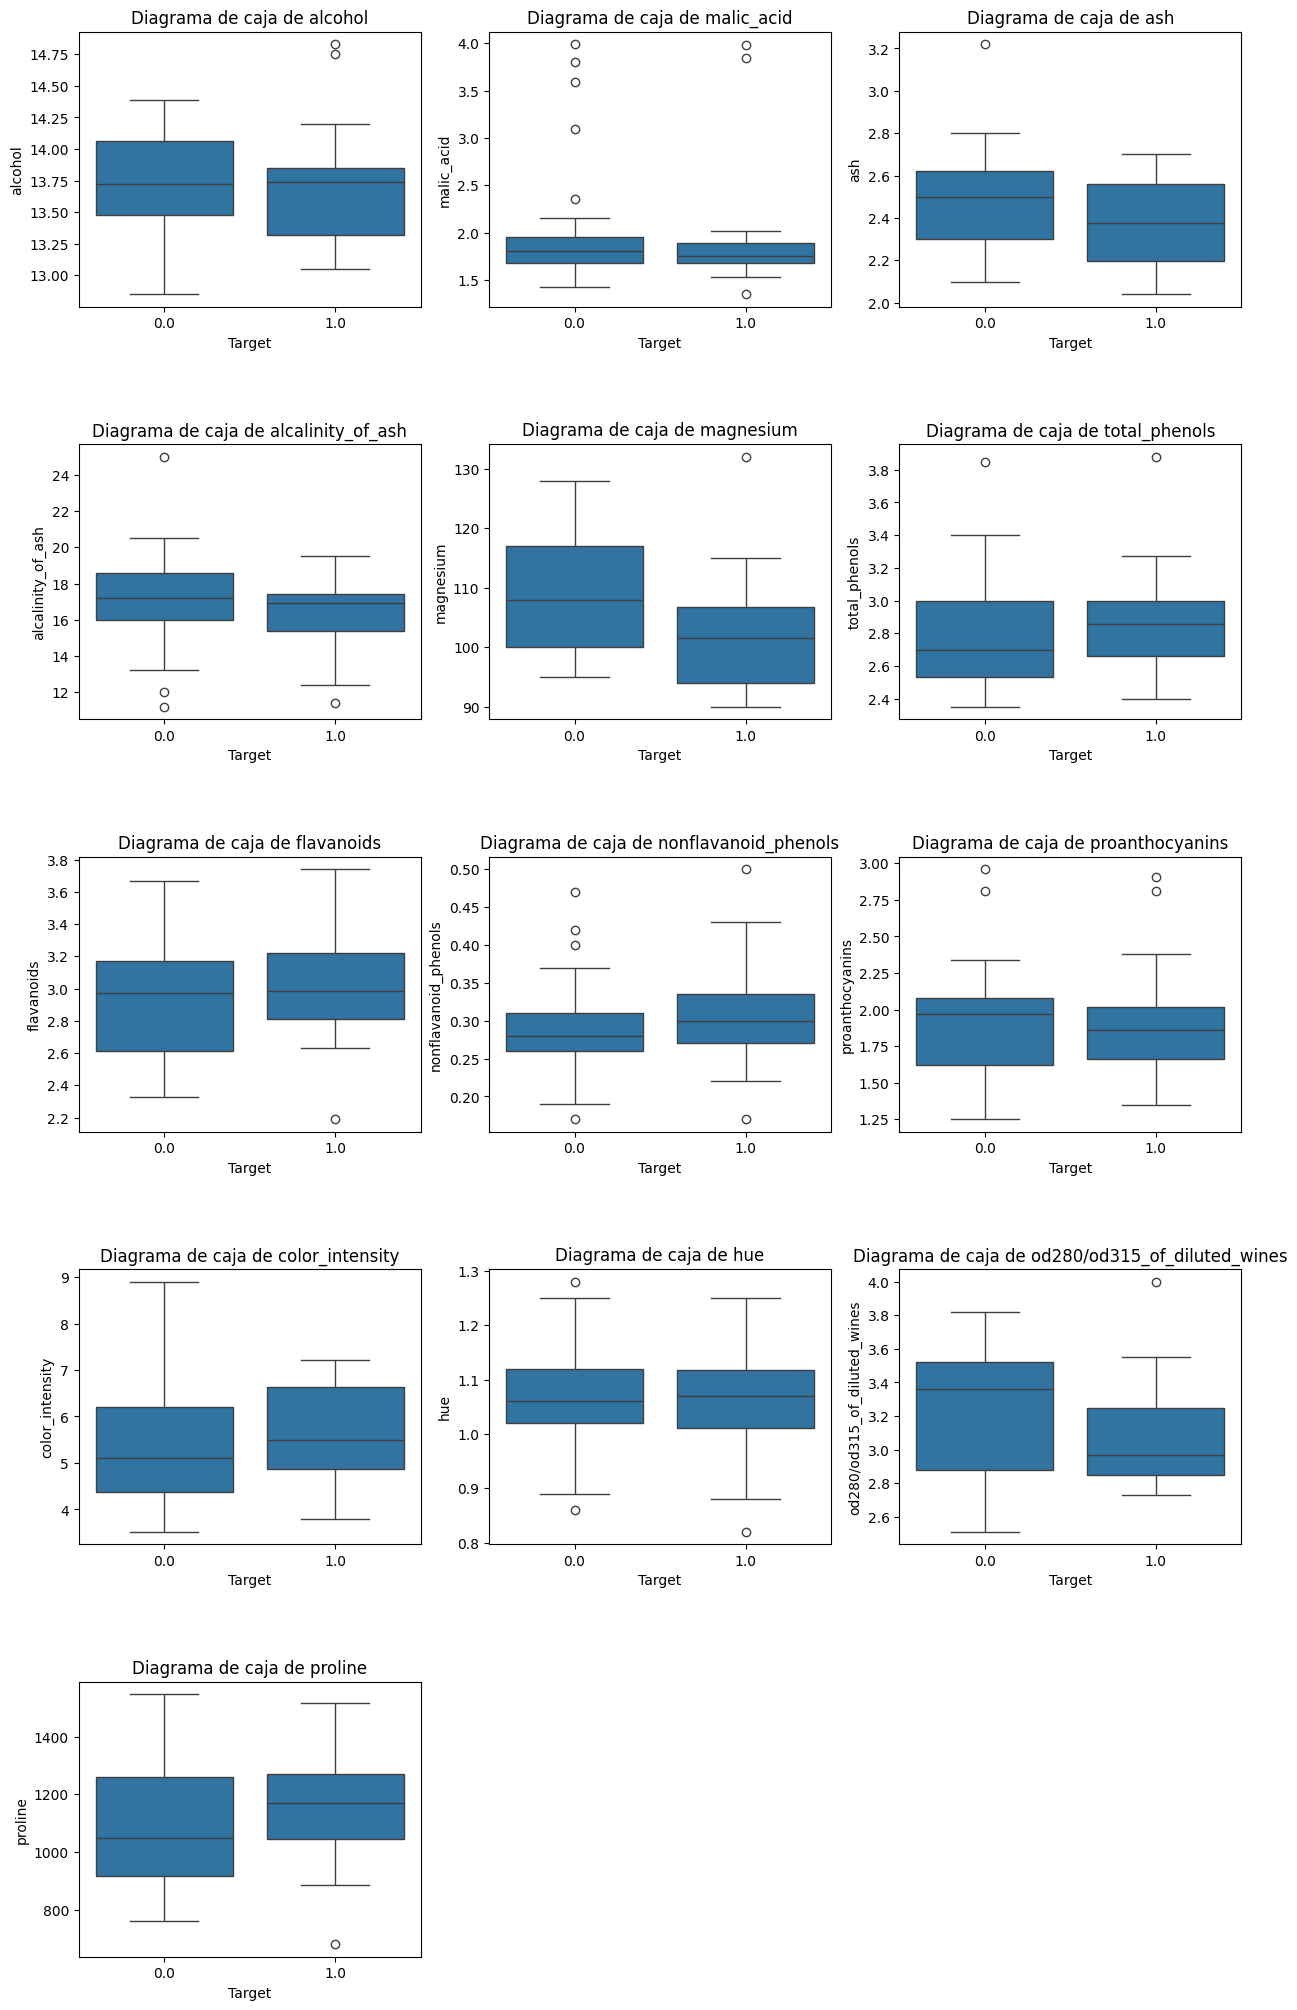

In [13]:
boxplots(X_train, y_train, feature_names)

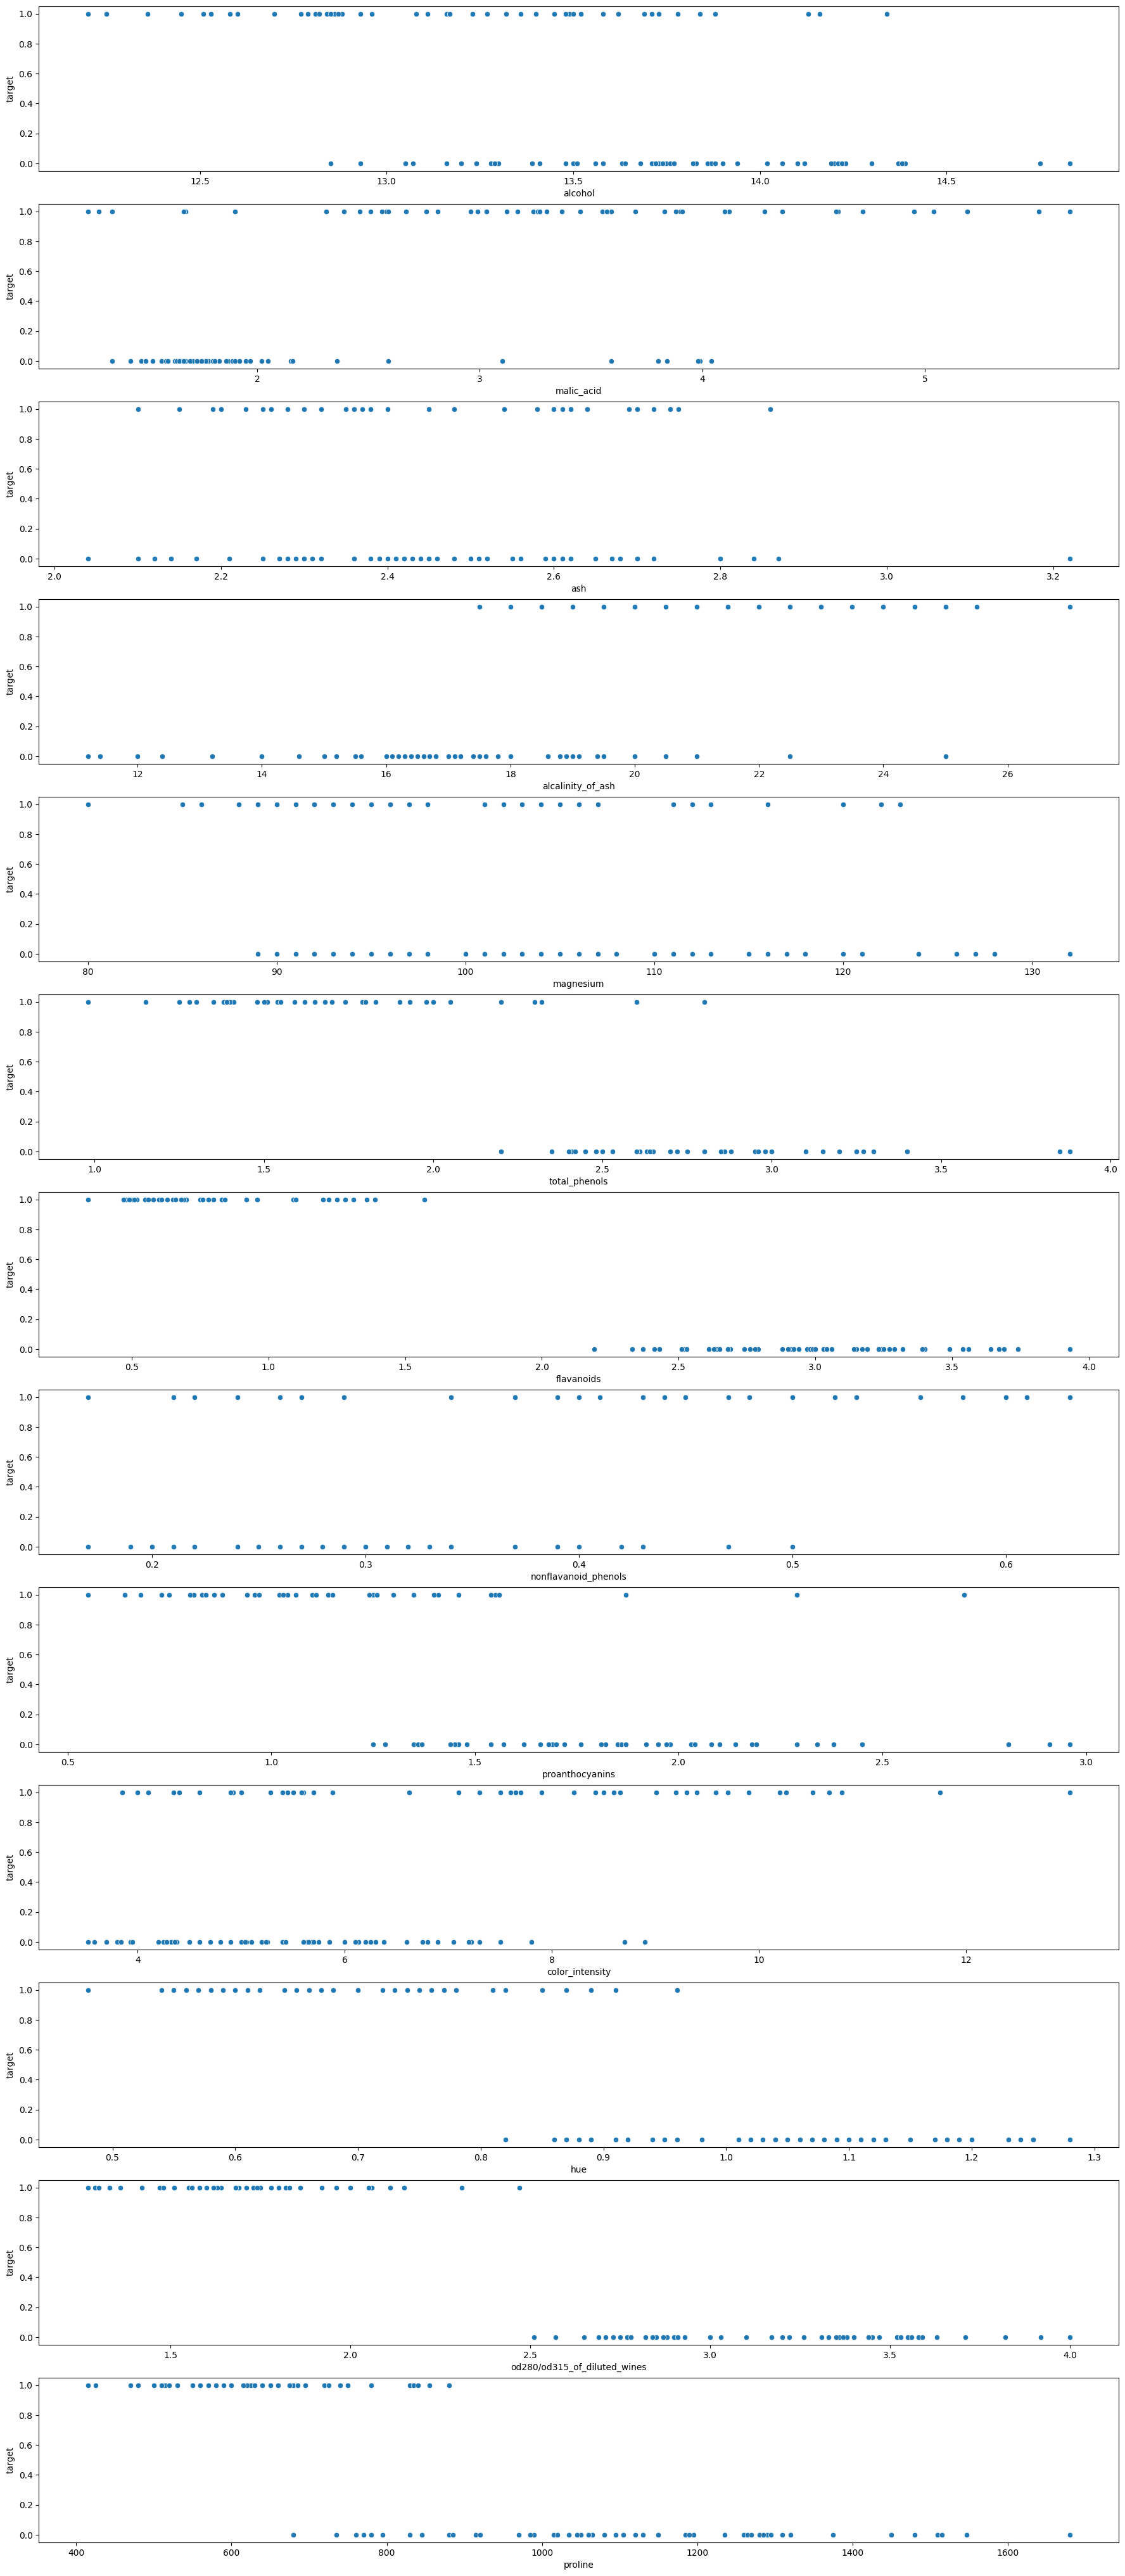

In [14]:
fig, ax = plt.subplots(len(feature_names),1,figsize=(22,4*len(feature_names)))
for i in range(len(feature_names)):
  sns.scatterplot(data=df, x=feature_names[i], y='target', ax=ax[i])
  ax[i].set_xlabel(feature_names[i])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train.reshape(len(y_train),))

LogisticRegression()

In [17]:
y_pred = model.predict(X_test_scaled)
y_ajuste_train = model.predict(X_train_scaled)

print('Métricas en el entrenamiento')
print(classification_report(y_train, y_ajuste_train))
print(confusion_matrix(y_train, y_ajuste_train))

print('Métricas en el conjunto de prueba')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Métricas en el entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

[[47  0]
 [ 0 38]]
Métricas en el conjunto de prueba
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

[[12  0]
 [ 0 10]]


In [18]:
df_coeficientes=pd.DataFrame(model.coef_.T, index=feature_names)

In [19]:
df_coeficientes

,0
alcohol,-0.189212
malic_acid,0.194931
ash,-0.014732
alcalinity_of_ash,0.473207
magnesium,-0.076314
total_phenols,-0.700980
flavanoids,-0.920707
nonflavanoid_phenols,0.442060
proanthocyanins,-0.517171
color_intensity,0.523928


<Axes: >

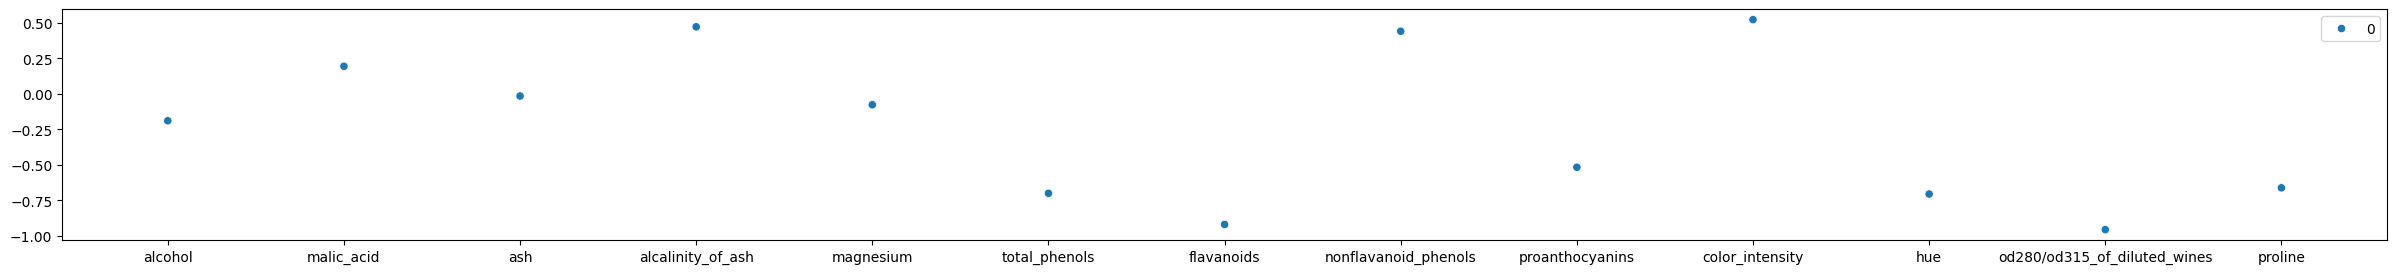

In [20]:
import seaborn as sns
fig, ax=plt.subplots(1,1,figsize=(30,3))
sns.scatterplot(data=df_coeficientes, ax=ax)

# **Explicabilidad SHAP**

In [21]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)

In [22]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

In [23]:
shap_values.shape

(22, 13)

In [24]:
len(y_test),len(feature_names)

(22, 13)

## Interpretabilidad **local**

In [25]:
index=0

In [26]:
model.predict_proba(X_test_scaled)[index]

array([0.00252787, 0.99747213])

 las probabilidades predichas por el modelo para cada clase, para cada observación del conjunto de test escalado (X_test_scaled).

 La salida es un array 2D de forma (n_muestras, n_clases).

 Cada fila representa una observación, y cada columna la probabilidad predicha de pertenecer a una clase.

In [27]:
model.predict(X_test_scaled)[index]

np.float64(1.0)

Esta función devuelve la clase predicha por el modelo para cada observación en X_test_scaled.

La salida es un array 1D con las clases predichas, uno por cada fila del test.

El resultado es un número entero que representa la clase que el modelo predice como la más probable para la primera observación del conjunto de test.



In [28]:
shap_values[index]

array([ 0.20571115,  0.37612884, -0.0026113 ,  0.37350103,  0.12073239,
        0.67724772,  1.09009986,  0.37792757,  0.67481256,  0.31487   ,
        1.15624187,  0.77303765,  0.60896784])

SHAP (SHapley Additive exPlanations) es un método para explicar las predicciones de un modelo. Se basa en la teoría de juegos de Shapley y mide cuánto aporta cada variable (feature) a la predicción de una observación.

En términos simples: los SHAP values explican por qué el modelo tomó una determinada decisión para una observación puntual.

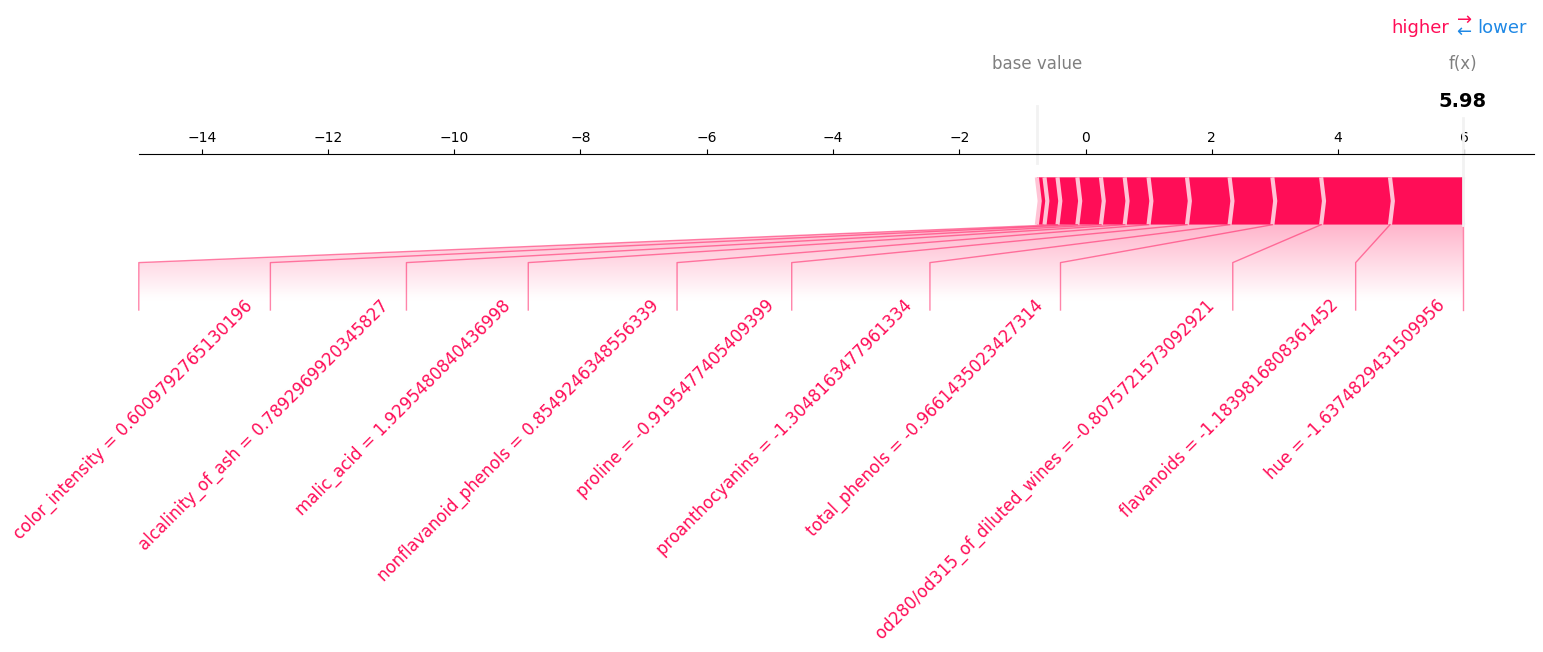

In [29]:
shap.force_plot(explainer.expected_value, shap_values[index],
                X_test_scaled[index], feature_names=feature_names,
                matplotlib=True, figsize=(18, 4), text_rotation=45)

In [30]:
explanation = shap.Explanation(values=shap_values[index],
                               base_values=explainer.expected_value,
                               feature_names=feature_names)

construye un objeto shap.Explanation, que encapsula de forma ordenada toda la información necesaria para visualizar y analizar los SHAP values de una observación.
Es una estructura de datos que contiene los shap values, el valor base del modelo y los nombres de las variables.

El **valor base** es el valor que el modelo predice antes de ver ninguna variable de una observación.

En regresión: el valor promedio de la variable target.

En clasificación: Binaria: probabilidad promedio de la clase positiva.

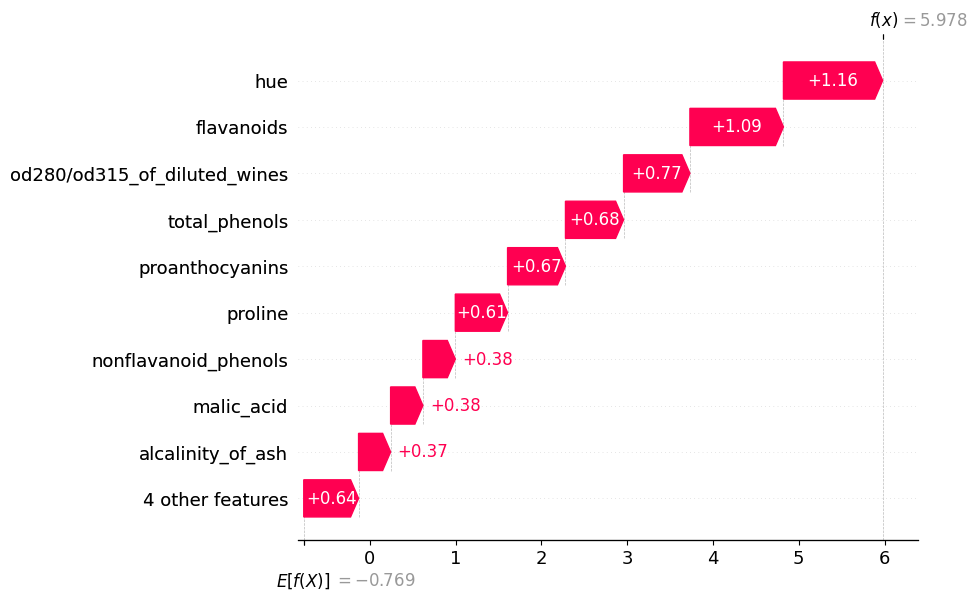

In [31]:
shap.plots.waterfall(explanation)

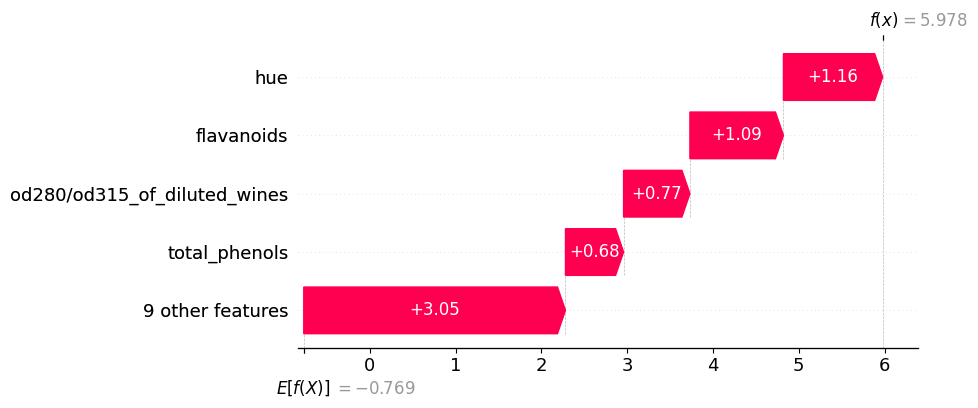

In [32]:
shap.plots.waterfall(explanation, max_display=5)

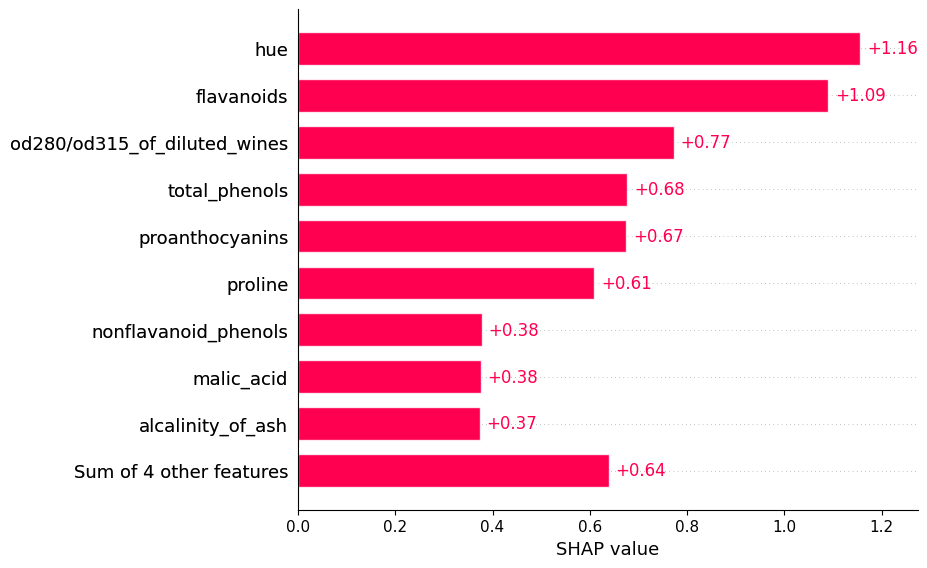

In [33]:
shap.plots.bar(explanation)

## Interpretabilidad **global**

In [34]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)

La diferencia con la explicabilidad local es que en valores se le pasan todos los shap_values, no solamente los de una observación. Y además hay que pasarle los datos de entrada.

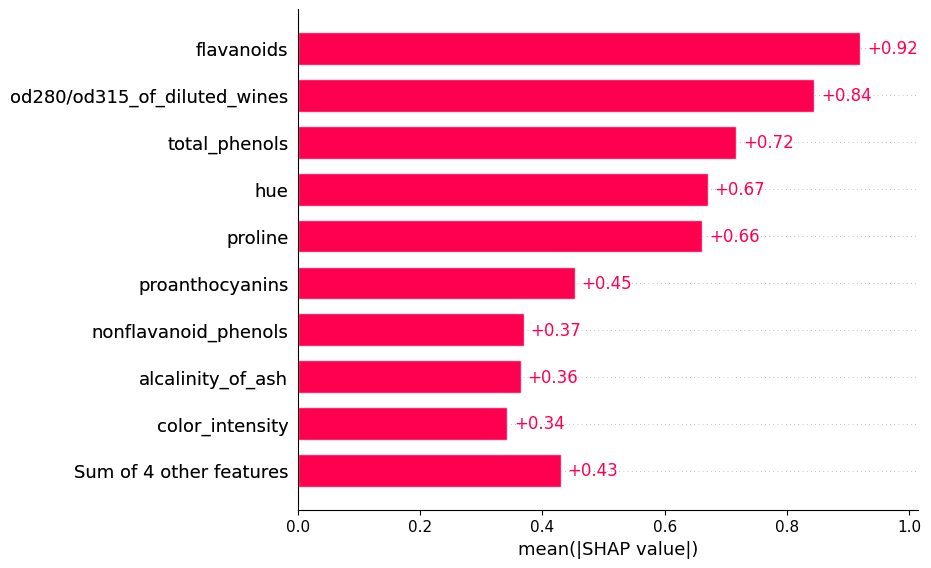

In [35]:
shap.plots.bar(explanation)

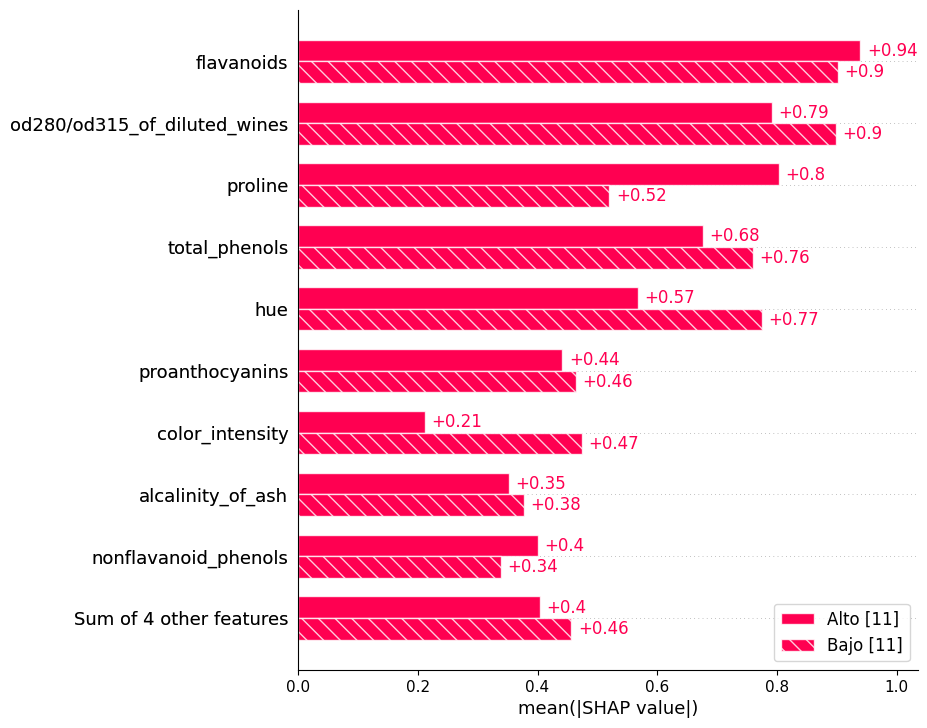

In [36]:
aux = [
    "Bajo" if explanation.data['alcohol'].iloc[i] <= 13.5 else "Alto"
    for i in range(explanation.shape[0])
]
shap.plots.bar(explanation.cohorts(aux).abs.mean(0))

Primero se crea un grupo categórico ("Bajo"/"Alto") según el valor de una variable (alcohol), y luego muestra un gráfico de importancia media absoluta de los SHAP values por grupo, usando un gráfico de barras.

Sirve para comparar visualmente qué variables tienen mayor impacto según si el valor de alcohol en la observación es "Bajo" o "Alto".

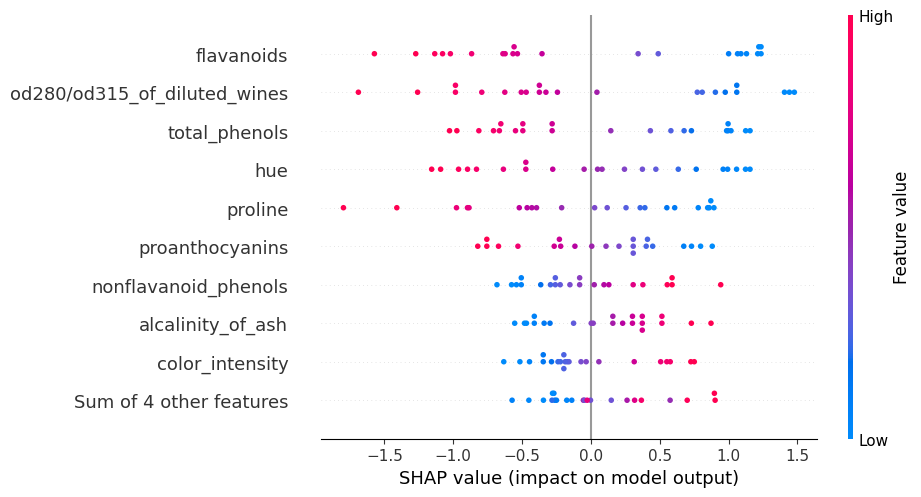

In [37]:
shap.plots.beeswarm(explanation)

El beeswarm es un gráfico donde cada punto representa una observación individual y muestra:

Qué tan importante fue una variable (valor SHAP).

En qué dirección influyó esa variable (a favor o en contra de una clase).

El valor real de la variable en esa observación (color del punto).

